Import necessary libraries

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


load datasets

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv').squeeze()
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()
#we used .squeeze to convert to 1D array


In [3]:
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (34189, 2)
y_val shape: (9817, 2)
y_test shape: (4836, 2)


In [4]:
print("First few rows of y_train:")
print(y_train.head())

print("\nFirst few rows of y_val:")
print(y_val.head())

print("\nFirst few rows of y_test:")
print(y_test.head())

First few rows of y_train:
   Unnamed: 0  income
0        7916       1
1       26447       1
2       20889       0
3       30145       1
4        7473       1

First few rows of y_val:
   Unnamed: 0  income
0       45250       1
1        4928       0
2        8051       0
3       14802       0
4       37465       1

First few rows of y_test:
   Unnamed: 0  income
0       38158       1
1       18770       1
2        5615       1
3        2064       1
4       33768       1


In [5]:
y_train = y_train['income']
y_val = y_val['income']
y_test = y_test['income']
#we only need the income column so we extract it

In [6]:
print(f'y_train shape after extraction: {y_train.shape}')
print(f'y_val shape after extraction: {y_val.shape}')
print(f'y_test shape after extraction: {y_test.shape}')


y_train shape after extraction: (34189,)
y_val shape after extraction: (9817,)
y_test shape after extraction: (4836,)


In [7]:
print("First few rows of y_train:")
print(y_train.head())

print("\nFirst few rows of y_val:")
print(y_val.head())

print("\nFirst few rows of y_test:")
print(y_test.head())

First few rows of y_train:
0    1
1    1
2    0
3    1
4    1
Name: income, dtype: int64

First few rows of y_val:
0    1
1    0
2    0
3    0
4    1
Name: income, dtype: int64

First few rows of y_test:
0    1
1    1
2    1
3    1
4    1
Name: income, dtype: int64


In [8]:
#naive Bayes classifier
nb_model = GaussianNB()

#training
nb_model.fit(X_train, y_train)

GaussianNB()

In [9]:

# predicting on validation data
y_val_pred = nb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Validation Accuracy: 77.28%


In [10]:
# predicting on test data
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 78.62%


In [11]:
print(X_train.head())


   Unnamed: 0  age  hours-per-week  workclass_ ?  workclass_ Federal-gov  \
0        7916   28              48             0                       0   
1       26447   23              20             0                       0   
2       20889   51              40             0                       0   
3       30145   65              55             0                       0   
4        7473   35              40             0                       0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   1   
1                     0                        0                   1   
2                     0                        0                   1   
3                     0                        0                   0   
4                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        0                    

In [12]:
# Load the datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

y_train = y_train['income']
y_val = y_val['income']
y_test = y_test['income']

#Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # random_state for reproducibility

# Training
dt_model.fit(X_train, y_train)

# Prediction on validation data
y_val_pred = dt_model.predict(X_val)

#validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Prediction on test data
y_test_pred = dt_model.predict(X_test)

# test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Validation Accuracy: 77.63%
Test Accuracy: 77.85%


In [13]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')['income']
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')['income']
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')['income']

nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)

# Training
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print("modles trained")


modles trained


In [14]:
# Prediction on validation set
y_val_pred_nb = nb_model.predict(X_val)
y_val_pred_dt = dt_model.predict(X_val)

print("predictons completed")


predictons completed


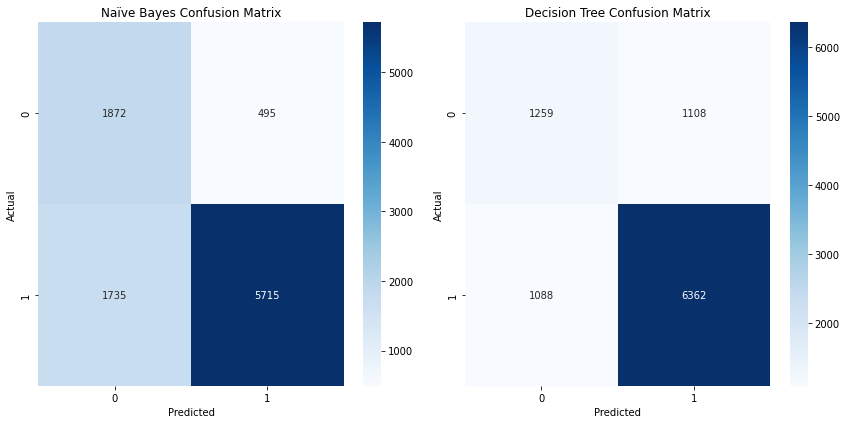

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#confusion matrices
cm_nb = confusion_matrix(y_val, y_val_pred_nb)
cm_dt = confusion_matrix(y_val, y_val_pred_dt)

# Plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Naïve Bayes Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[0])
axes[0].set_title('Naïve Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Naïve Bayes
cm_nb = confusion_matrix(y_val, y_val_pred_nb)
# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_val, y_val_pred_dt)

# Function to calculate the metrics from confusion matrix
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy, precision, recall, specificity, f1

# metrics for Naïve Bayes
acc_nb, prec_nb, rec_nb, spec_nb, f1_nb = calculate_metrics(cm_nb)

# metrics for Decision Tree
acc_dt, prec_dt, rec_dt, spec_dt, f1_dt = calculate_metrics(cm_dt)

# Print the metrics
print(f"Naïve Bayes Metrics:")
print(f"Accuracy: {acc_nb:.4f}, Precision: {prec_nb:.4f}, Recall: {rec_nb:.4f}, Specificity: {spec_nb:.4f}, F1 Score: {f1_nb:.4f}")
print(f"\nDecision Tree Metrics:")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {rec_dt:.4f}, Specificity: {spec_dt:.4f}, F1 Score: {f1_dt:.4f}")


Naïve Bayes Metrics:
Accuracy: 0.7728, Precision: 0.9203, Recall: 0.7671, Specificity: 0.7909, F1 Score: 0.8367

Decision Tree Metrics:
Accuracy: 0.7763, Precision: 0.8517, Recall: 0.8540, Specificity: 0.5319, F1 Score: 0.8528


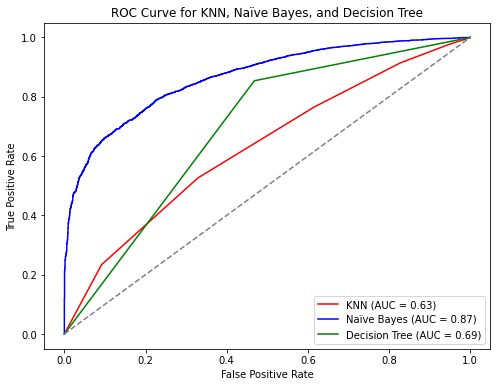

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Hardcoded FPR and TPR for KNN
fpr_knn = [0.0, 0.09167723, 0.32910858, 0.61596958, 0.82762991, 0.94761301, 0.99070553, 0.99915505, 1.0]
tpr_knn = [0.0, 0.23369128, 0.52630872, 0.76563758, 0.91409396, 0.97651007, 0.99530201, 0.99959732, 1.0]

lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val).ravel()

y_val_prob_nb = nb_model.predict_proba(X_val)[:, 1]
y_val_prob_dt = dt_model.predict_proba(X_val)[:, 1]

# ROC curves for Naïve Bayes and Decision Tree
fpr_nb, tpr_nb, _ = roc_curve(y_val_bin, y_val_prob_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_val_bin, y_val_prob_dt)

# AUC for Naïve Bayes, Decision Tree, and KNN
auc_nb = auc(fpr_nb, tpr_nb)
auc_dt = auc(fpr_dt, tpr_dt)
auc_knn = auc(fpr_knn, tpr_knn)

# ROC curves plot
plt.figure(figsize=(8, 6))

# knn
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='red')

# Naïve Bayes ROC curve
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.2f})', color='blue')

# Decision Tree ROC curve
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green')

# diagonal line representing random classification
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve for KNN, Naïve Bayes, and Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')

plt.show()


Naïve Bayes Performance on Test Set:
Accuracy: 0.7862
Precision: 0.9273
Recall: 0.7831
Specificity: 0.7964
F1 Score: 0.8491


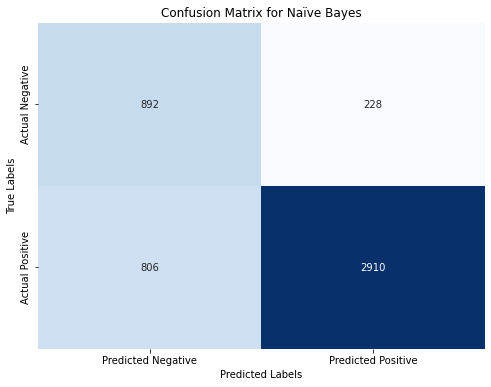

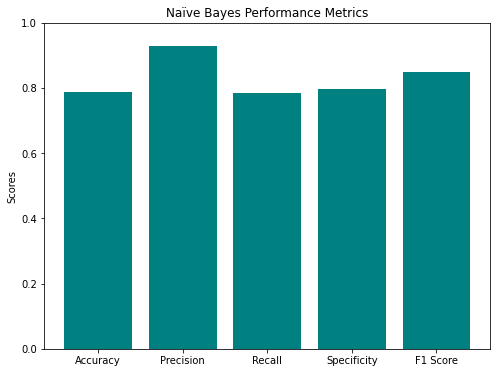

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set using Naïve Bayes
y_test_pred_nb = nb_model.predict(X_test)

# Confusion Matrix for Naïve Bayes on the test set
cm_test_nb = confusion_matrix(y_test, y_test_pred_nb)

TN, FP, FN, TP = cm_test_nb.ravel()

# Metrics from the confusion matrix
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("Naïve Bayes Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_nb, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Naïve Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1
}

# Bar chart for the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color='teal')
plt.title('Naïve Bayes Performance Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Metrics are between 0 and 1
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

y_train = y_train['income']
y_val = y_val['income']
y_test = y_test['income']

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_val_pred = dt_model.predict(X_val)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

y_test_pred = dt_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

feature_importance = dt_model.feature_importances_
features = X_train.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print("Top 5 Important Features:")
print(feature_df.head())



Validation Accuracy: 77.63%
Test Accuracy: 77.85%
Top 5 Important Features:
                               Feature  Importance
0                           Unnamed: 0    0.251904
30  marital-status_ Married-civ-spouse    0.196534
1                                  age    0.142639
2                       hours-per-week    0.086076
21                education_ Bachelors    0.032543


Naïve Bayes Confusion Matrix Results:
True Positives: 5715, True Negatives: 1872, False Positives: 495, False Negatives: 1735
Accuracy: 0.7728
Precision: 0.9203
Recall: 0.7671
Specificity: 0.7909
F1 Score: 0.8367

Decision Tree Confusion Matrix Results:
True Positives: 6362, True Negatives: 1259, False Positives: 1108, False Negatives: 1088
Accuracy: 0.7763
Precision: 0.8517
Recall: 0.8540
Specificity: 0.5319
F1 Score: 0.8528



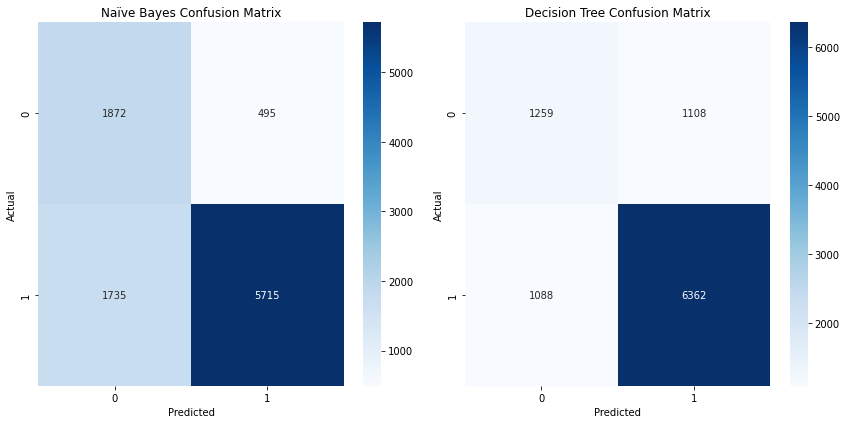

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Confusion matrices for Naïve Bayes and Decision Tree
cm_nb = confusion_matrix(y_val, y_val_pred_nb)
cm_dt = confusion_matrix(y_val, y_val_pred_dt)

# Naïve Bayes
TN_nb, FP_nb, FN_nb, TP_nb = cm_nb.ravel()

# Decision Tree
TN_dt, FP_dt, FN_dt, TP_dt = cm_dt.ravel()

def calculate_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, specificity, f1

#metrics for both models
metrics_nb = calculate_metrics(TP_nb, TN_nb, FP_nb, FN_nb)
metrics_dt = calculate_metrics(TP_dt, TN_dt, FP_dt, FN_dt)

print("Naïve Bayes Confusion Matrix Results:")
print(f"True Positives: {TP_nb}, True Negatives: {TN_nb}, False Positives: {FP_nb}, False Negatives: {FN_nb}")
print(f"Accuracy: {metrics_nb[0]:.4f}")
print(f"Precision: {metrics_nb[1]:.4f}")
print(f"Recall: {metrics_nb[2]:.4f}")
print(f"Specificity: {metrics_nb[3]:.4f}")
print(f"F1 Score: {metrics_nb[4]:.4f}\n")

print("Decision Tree Confusion Matrix Results:")
print(f"True Positives: {TP_dt}, True Negatives: {TN_dt}, False Positives: {FP_dt}, False Negatives: {FN_dt}")
print(f"Accuracy: {metrics_dt[0]:.4f}")
print(f"Precision: {metrics_dt[1]:.4f}")
print(f"Recall: {metrics_dt[2]:.4f}")
print(f"Specificity: {metrics_dt[3]:.4f}")
print(f"F1 Score: {metrics_dt[4]:.4f}\n")

#confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Naïve Bayes Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[0])
axes[0].set_title('Naïve Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
